In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

import warnings
warnings.filterwarnings("ignore", "is_categorical_dtype")
warnings.filterwarnings("ignore", "use_inf_as_na")

font = {'size'   : 12}

matplotlib.rc('font', **font)

In [3]:
create_time = pd.read_csv("../results_03_15/FAST_KNN_NO_ObjIndex_L9_search_timeline_100000_100000.csv", names=['obj_search', 'insert', 'ar', 'des_count', 'level']).reset_index()
create_time['name'] = 'fast'
create_time['obj_search'] = create_time['obj_search'] / 1000000
create_time['insert'] = create_time['insert'] / 1000000
create_time = create_time.melt(id_vars=['index', 'name', 'ar', 'des_count', 'level'], var_name='stage', value_name='time')

create_time

,index,name,ar,des_count,level,stage,time
0,0,fast,NaN,NaN,NaN,obj_search,0.334720
1,1,fast,NaN,NaN,NaN,obj_search,0.175075
2,2,fast,NaN,NaN,NaN,obj_search,0.309233
3,3,fast,NaN,NaN,NaN,obj_search,0.045909
4,4,fast,NaN,NaN,NaN,obj_search,0.414075
...,...,...,...,...,...,...,...
199995,99995,fast,NaN,NaN,NaN,insert,NaN
199996,99996,fast,NaN,NaN,NaN,insert,NaN
199997,99997,fast,NaN,NaN,NaN,insert,NaN
199998,99998,fast,NaN,NaN,NaN,insert,NaN


## Creation time

(0.0, 10.0)

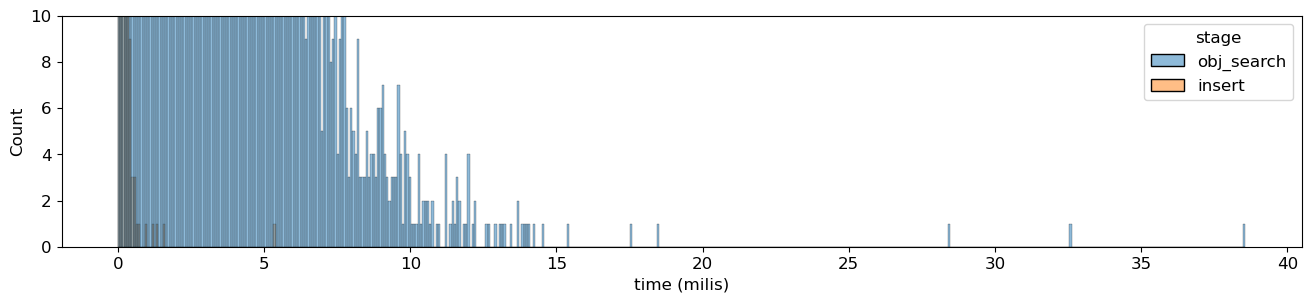

In [3]:
plt.figure(figsize=(16,3))
sns.histplot(x='time', bins=500, hue='stage', multiple='layer', data=create_time)
plt.xlabel('time (milis)')
plt.ylim(0, 10)

**Miserable queries**

Queries that takes too much time (>100 milis). 

In [4]:
miserable_queries = create_time[create_time['time'] > 5].sort_values('time', ascending=False)
miserable_queries

,index,name,ar,des_count,level,stage,time
1820,1820,fast,1.797693e+308,0,9,obj_search,38.557057
3510,3510,fast,1.797693e+308,0,9,obj_search,32.544023
7867,7867,fast,1.558860e+02,0,9,obj_search,28.407494
1043,1043,fast,1.797693e+308,0,9,obj_search,18.500308
99895,99895,fast,1.357917e+02,0,9,obj_search,17.542818
...,...,...,...,...,...,...,...
3051,3051,fast,1.797693e+308,0,9,obj_search,5.010687
49904,49904,fast,1.797693e+308,0,9,obj_search,5.008938
27702,27702,fast,1.797693e+308,0,9,obj_search,5.006702
92783,92783,fast,1.797693e+308,0,9,obj_search,5.005582


(0.0, 25.0)

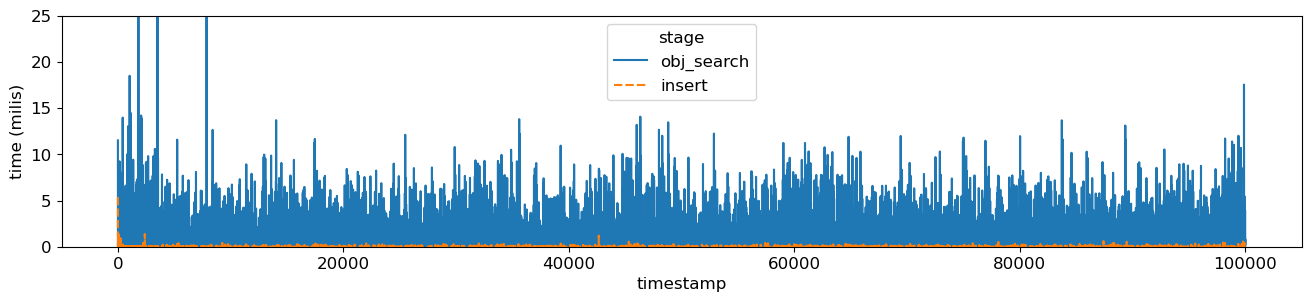

In [5]:
# step = 500000
# for i in range(0, 2500000, step):
plt.figure(figsize=(16,3))
sns.lineplot(x='index', y='time', hue='stage', style='stage', data=create_time)
plt.xlabel('timestamp')
plt.ylabel('time (milis)')
plt.ylim(0, 25)

Relative time (FAST vs CkQST)

In [6]:
# relative_create = create_time[create_time['stage'] == 'insert']['time'].reset_index() - create_time[create_time['stage'] == 'obj_search']['time'].reset_index()
# relative_create
# plt.figure(figsize=(16,8))
# sns.lineplot(data=relative_create)
# plt.xlabel('timestamp')
# plt.ylabel('time (milis)')

## Load Queries

In [7]:
queries_df = pd.read_json('../../data/exported/places_o200000_q2500000_scaled.json', lines=True);
queries_df = queries_df.iloc[200000:, :].reset_index(drop=True).drop(columns=['id']).reset_index()

queries_df.tail()

,index,x,y,keywords,scaled
2499995,2499995,409.894898,103.097463,"[telephone, cellular]",True
2499996,2499996,402.284307,107.998284,[contractor],True
2499997,2499997,406.953882,110.040834,[church],True
2499998,2499998,412.621720,107.253521,"[lounge, drinking, eating, cocktail]",True
2499999,2499999,412.835319,107.262331,"[coping, plastering, tiling, pool, swimming]",True


### Properties of miserable queries

In [8]:
queries_df.shape

(2500000, 5)

In [9]:
details = queries_df.join(miserable_queries.set_index('index'), on='index').dropna().sort_values('time', ascending=False)
# details = details[details['name'] == 'fast']
inf_val = details['ar'].max()
details['ar'] = details['ar'].apply(lambda x: np.inf if x >= inf_val else x)
all = details.drop(columns=['x', 'y']).rename(columns={'time': 'insertion time (milis)'})

In [10]:
obj_search = all[all['stage'] == 'obj_search']
insert = all[all['stage'] == 'insert']

# insert#.join(ckqsts, rsuffix='_')
insert.head(25)
# all.head(25)

,index,keywords,scaled,name,ar,des_count,level,stage,insertion time (milis)
0,0,"[physician, surgeon]",True,fast,20.956067,0.0,9.0,insert,5.385478


In [11]:
obj_search.head(25)

,index,keywords,scaled,name,ar,des_count,level,stage,insertion time (milis)
1820,1820,"[lawn, maintenance, grounds]",True,fast,inf,0.0,9.0,obj_search,38.557057
3510,3510,[software],True,fast,inf,0.0,9.0,obj_search,32.544023
7867,7867,[attorney],True,fast,155.885976,0.0,9.0,obj_search,28.407494
1043,1043,[audio],True,fast,inf,0.0,9.0,obj_search,18.500308
99895,99895,"[dealer, rug]",True,fast,135.791708,0.0,9.0,obj_search,17.542818
99898,99898,"[excavating, contractor]",True,fast,6.754151,0.0,9.0,obj_search,15.362719
1114,1114,[door],True,fast,inf,0.0,9.0,obj_search,14.511244
2062,2062,"[party, planning]",True,fast,inf,0.0,9.0,obj_search,14.205389
46343,46343,[ranch],True,fast,inf,0.0,9.0,obj_search,14.073523
426,426,"[hanging, contractor]",True,fast,inf,0.0,9.0,obj_search,13.970665


## Query size vs Insertion time

In [12]:
stats = create_time.copy()
stats = queries_df.join(stats.set_index('index'), on='index').dropna()

In [13]:
stats['n_keywords'] = stats['keywords'].apply(lambda x: min(len(x), 5))

### Query index insert

<Axes: xlabel='ar', ylabel='time'>

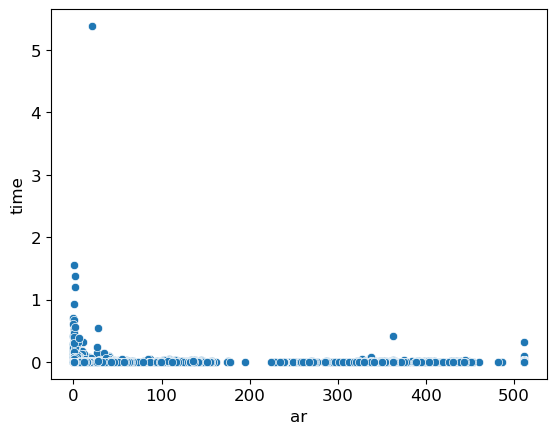

In [38]:
insert_only = pd.DataFrame(stats[stats['stage'] == 'insert'])
insert_only['ar'] = insert_only['ar'].apply(lambda x: 512 if x > 512 else x)

sns.scatterplot(y='time', x='ar', data=insert_only.loc[:, ['ar', 'time']])

<Axes: xlabel='n_keywords', ylabel='time'>

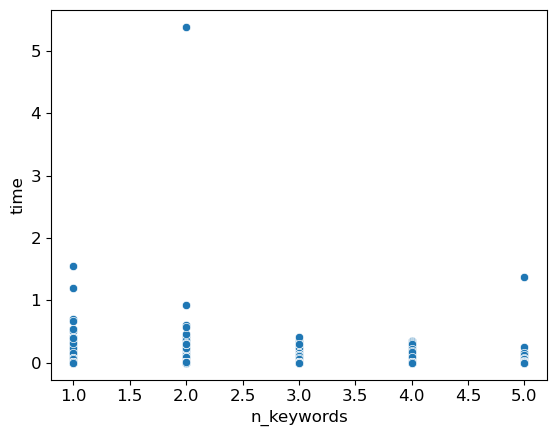

In [39]:
sns.scatterplot(y='time', x='n_keywords', data=insert_only.loc[:, ['n_keywords', 'time']])

<Axes: xlabel='des_count', ylabel='time'>

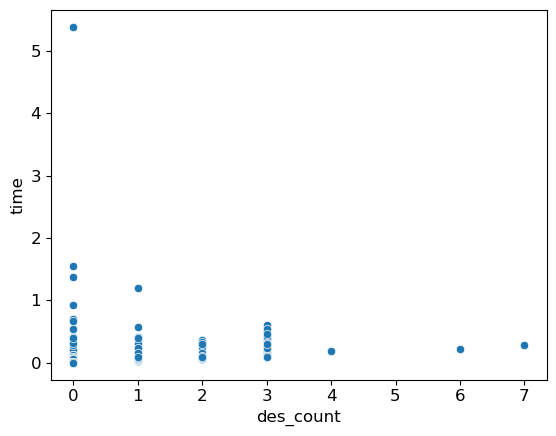

In [40]:
sns.scatterplot(y='time', x='des_count', data=insert_only.loc[:, ['des_count', 'time']])

<Axes: xlabel='level', ylabel='time'>

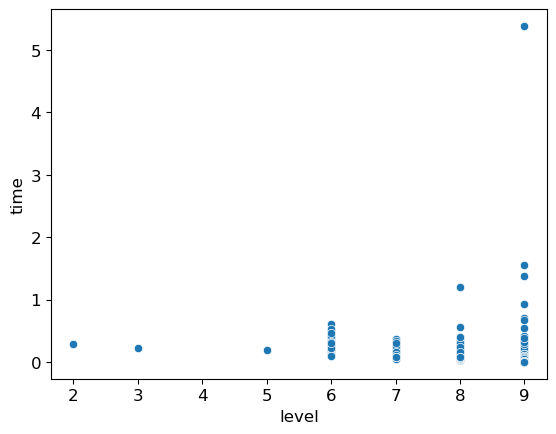

In [41]:
sns.scatterplot(y='time', x='level', data=insert_only.loc[:, ['level', 'time']])

In [42]:
out = insert_only.loc[:, ['level', 'time']]

<Axes: xlabel='level', ylabel='Count'>

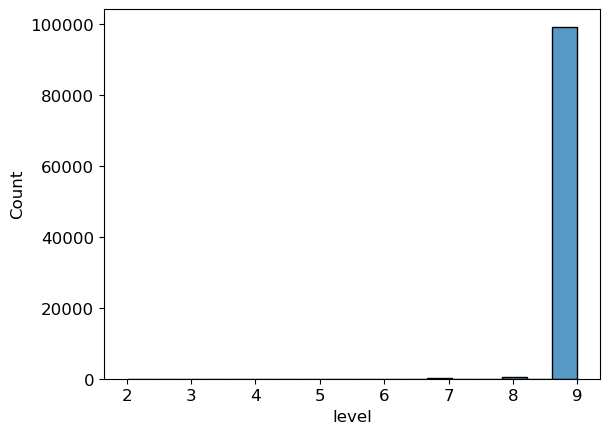

In [43]:
sns.histplot(out['level'])

(0.0, 15000.0)

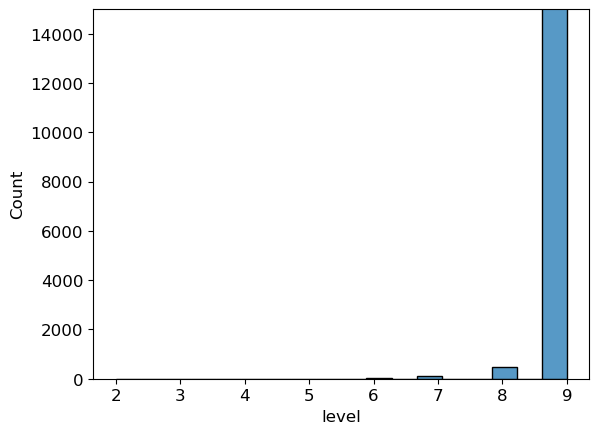

In [44]:
sns.histplot(out['level'])
plt.ylim(0, 15000)

Text(0, 0.5, 'avg. insert time (query index - fast)')

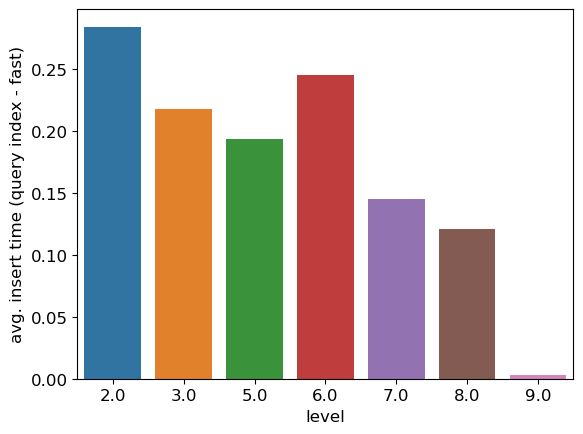

In [45]:
hist_out = out.groupby('level').mean().reset_index()
sns.barplot(x='level', y='time', data=hist_out)
plt.ylabel('avg. insert time (query index - fast)')

### Obj index search

<Axes: xlabel='ar', ylabel='time'>

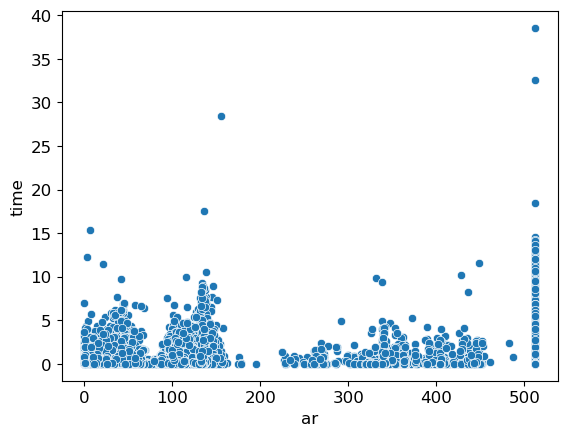

In [46]:
search_only = pd.DataFrame(stats[stats['stage'] == 'obj_search'])
search_only['ar'] = search_only['ar'].apply(lambda x: 512 if x > 512 else x)

sns.scatterplot(y='time', x='ar', data=search_only.loc[:, ['ar', 'time']])

<Axes: xlabel='n_keywords', ylabel='time'>

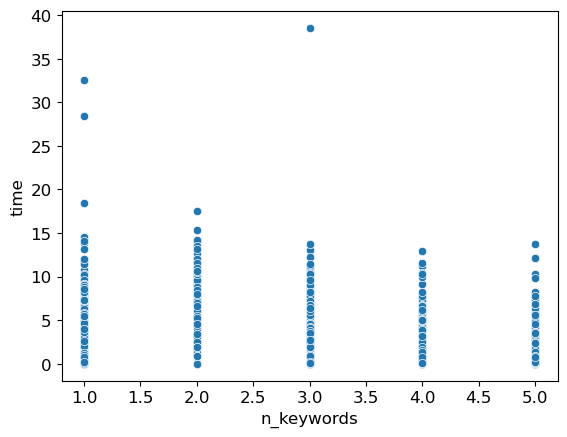

In [47]:
sns.scatterplot(y='time', x='n_keywords', data=search_only.loc[:, ['n_keywords', 'time']])

<Axes: xlabel='des_count', ylabel='time'>

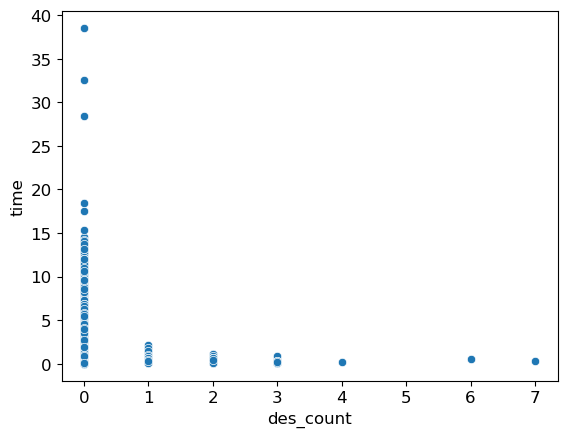

In [48]:
sns.scatterplot(y='time', x='des_count', data=search_only.loc[:, ['des_count', 'time']])

<Axes: xlabel='level', ylabel='time'>

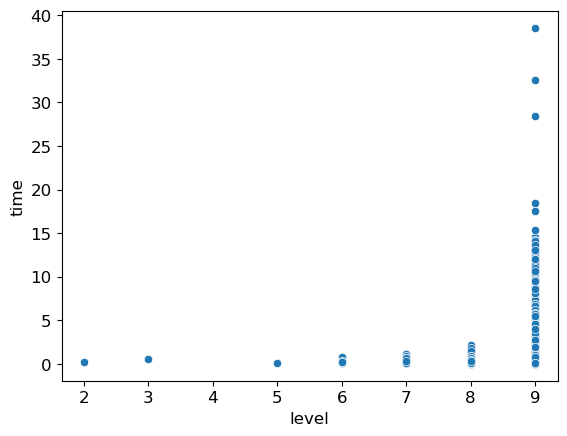

In [49]:
sns.scatterplot(y='time', x='level', data=search_only.loc[:, ['level', 'time']])